# Статистика решений задач по датасетом, базовая версия
## 1. Простой датасет
Логи:
```
Task 0: expected="118", got="118" → CORRECT
Task 1: expected="5", got="5" → CORRECT
Task 2: expected="30", got="30 minutes" → WRONG
Task 3: expected="1", got="1" → CORRECT
Task 4: expected="15", got="None" → WRONG
Task 5: expected="\frac{1}{4}", got="\(\boxed{\frac{1}{4}}\)" → WRONG
Task 6: expected="90", got="90" → CORRECT
Task 7: expected="1", got="1" → CORRECT
Task 8: expected="144", got="\[
\boxed{144}
\]" → WRONG
Task 9: expected="5", got="5" → CORRECT
Task 10: expected="588", got="588" → CORRECT

========================================
Results: 7/11 tasks completed successfully
Success rate: 63.6%
```
Результаты:
* 7/11: правильный ответ в ожидаемом формате.
* 2/11: правильный ответ, но в неожиданной записи LaTeX (задачи 5 и 8)
* 1/11: правильный ответ, но нейросеть добавила единицы измерения, которых не было в ответе (задача 2).
* 1/11: нет ответа (скорее всего, ошибка парсинга ответа LLM).

**Итог**: правильно решено 10/11 задач.

In [51]:
import matplotlib.pyplot as plt
from typing import Dict, Set
import matplotlib.patches as mpatches
import matplotlib.cm as cm


def plot_solver_results_pie(
    solutions_statuses: Dict[str, int],
    title: str = "LLM Solver Results"
):
    """
    GPT-generated code for plotting doughnut chart of solver results.
    """

    FAILED_STATUSES = {"No answer", "Wrong answer"}

    statuses = list(solutions_statuses.keys())
    counts = list(solutions_statuses.values())

    is_failed = [status in FAILED_STATUSES for status in statuses]

    # Helper to generate colors
    def get_colors(num_statuses: int, cmap_name: str):
        cmap = cm.get_cmap(cmap_name)
        if num_statuses == 1:
            return [cmap(0.65)]  # middle of the range
        else:
            return [cmap(0.4 + 0.5 * i / (num_statuses - 1)) for i in range(num_statuses)]

    # Count how many correct / failed statuses
    num_correct = sum(not f for f in is_failed)
    num_failed = sum(is_failed)

    correct_colors = get_colors(num_correct, "Blues")
    failed_colors = get_colors(num_failed, "Reds")

    # Assign colors in order
    colors = []
    ci = 0
    fi = 0
    for failed in is_failed:
        if failed:
            colors.append(failed_colors[fi])
            fi += 1
        else:
            colors.append(correct_colors[ci])
            ci += 1

    fig, ax = plt.subplots(figsize=(10, 7))

    wedges, texts, autotexts = ax.pie(
        counts,
        labels=statuses,
        autopct="%d%%",
        startangle=90,
        pctdistance=0.8,
        colors=colors,
        wedgeprops=dict(width=0.35, edgecolor="black")
    )

    # Apply hatching to failed statuses
    for wedge, failed in zip(wedges, is_failed):
        if failed:
            wedge.set_hatch("//")

    # Center text summarizing correctness
    total = sum(counts)
    failed_total = sum(c for c, f in zip(counts, is_failed) if f)
    success_total = total - failed_total

    ax.text(
        0, 0,
        f"Total: {total}\nCorrect: {success_total}\nIncorrect: {failed_total}",
        ha="center", va="center", fontsize=11
    )

    ax.set_title(title)
    ax.set_aspect("equal")

    # Legend
    legend_handles = [
        mpatches.Patch(
            facecolor=cm.Blues(0.65),
            edgecolor="black",
            label="Correct status"
        ),
        mpatches.Patch(
            facecolor=cm.Reds(0.65),
            edgecolor="black",
            hatch="//",
            label="Incorrect / failed status"
        ),
    ]
    ax.legend(
        handles=legend_handles,
        loc="upper right",
        bbox_to_anchor=(1.15, 1.0)  # move legend outside chart
    )

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_60835/3447961626.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


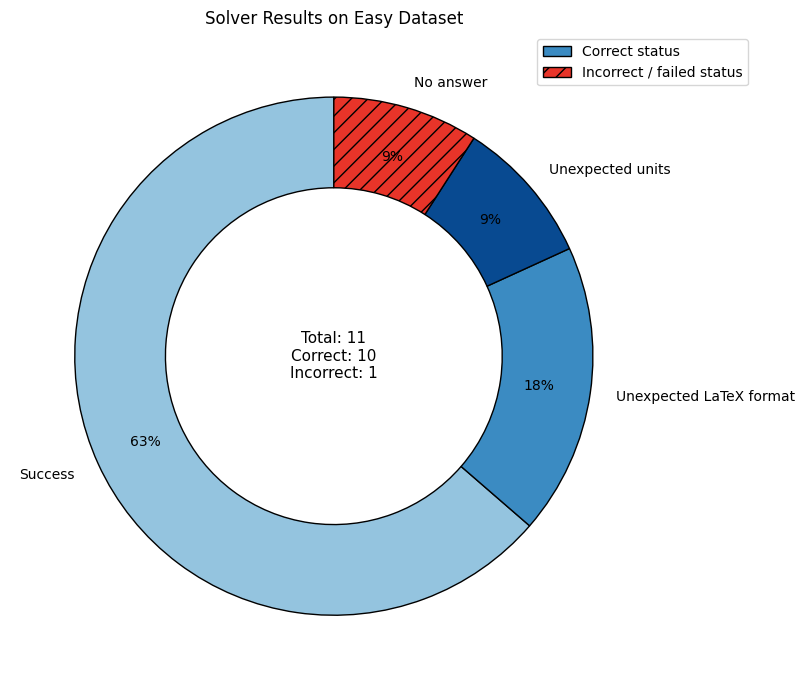

In [49]:
# status: str -> count: int
solutions_statuses = {
    "Success": 7,
    "Unexpected LaTeX format": 2,
    "Unexpected units": 1,
    "No answer": 1
}

plot_solver_results_pie(solutions_statuses, "Solver Results on Easy Dataset")
del solutions_statuses


## 2. Сложный датасет
Логи:
```
Task 0: expected="296", got="296" → CORRECT
Task 1: expected="48", got="48" → CORRECT
Task 2: expected="90", got="81" → WRONG
Task 3: expected="100", got="11" → WRONG
Task 4: expected="\frac{7}{8}", got="\[
\boxed{\frac{49}{56}}
\]" → WRONG
Task 5: expected="36", got="36" → CORRECT
Task 6: expected="28", got="56" → WRONG
Task 7: expected="\frac{1}{\sqrt{2}}", got="\[
\boxed{ \sin \phi = \sqrt{ \frac{ 1 + \sqrt{13} }{ 8 } } }
\]" → WRONG
Task 8: expected="18x^3+8x^2", got="\(18x^3 + 8x^2\)" → WRONG
Task 9: expected="\sqrt[4]{3}", got="\( a = 3^{1/4} \)" → WRONG
Task 10: expected="3", got="3" → CORRECT
Task 11: expected="\frac{1}{6}", got="\[
\boxed{\frac{1}{3}}
\]" → WRONG
Task 12: expected="11", got="0" → WRONG
Task 13: expected="12", got="12" → CORRECT
Task 14: expected="\frac{7}{25}", got="\[
\boxed{\dfrac{7}{25}}
\]" → WRONG
Task 15: expected="2\sqrt{2}", got="\[
2\sqrt{2}
\]" → WRONG
Task 16: expected="1/3", got="\[
\boxed{\frac{1}{3}}
\]" → WRONG
Task 17: expected="120", got="1998" → WRONG
Task 18: expected="720 \pi", got="\[
\boxed{24\sqrt{5}}
\]" → WRONG
Task 19: expected="-1", got="\( a = 0,\, 3,\, -1 \)" → WRONG

========================================
Results: 5/20 tasks completed successfully
Success rate: 25.0%
```
Результаты:
* 5/20: правильный ответ в ожидаемом формате.
* 3/20: правильный ответ, но в неожиданной записи LaTeX (задачи 8, 14, 15, 16).
* 1/20: правильный ответ, но в другой математической записи (задача 9: `3^{1/4}` есть $\sqrt[4]{3}$).
* 1/20: правильный ответ, но не в упрощенный форме (задача 4: $49/56$ вместо $7/8$).
* 10/20: неправильный ответ.

**Итог**: правильно решено 10/20 задач

/tmp/ipykernel_60835/2444671367.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


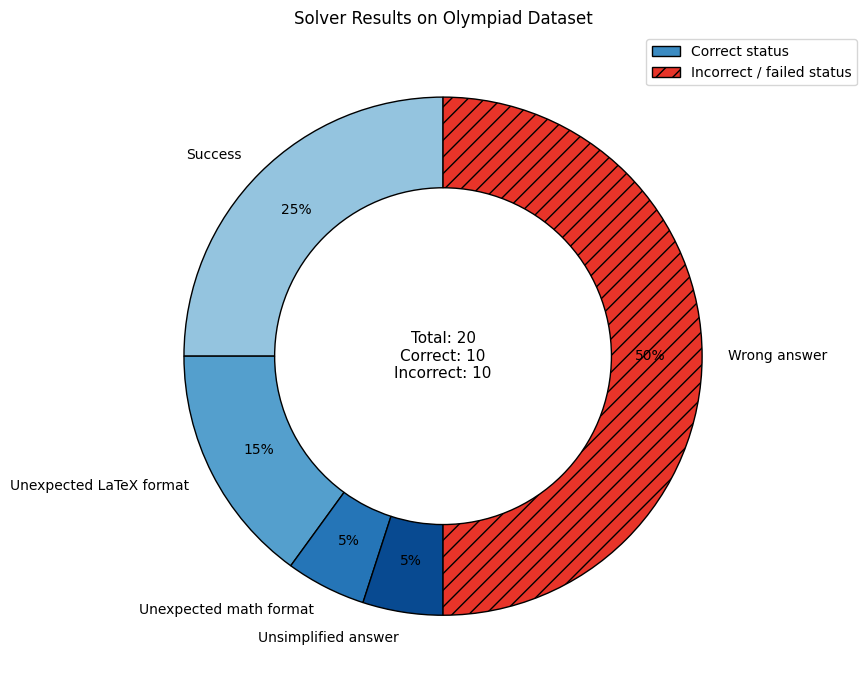

In [54]:
solutions_statuses = {
    "Success": 5,
    "Unexpected LaTeX format": 3,
    "Unexpected math format": 1,
    "Unsimplified answer": 1,
    "Wrong answer": 10
}

plot_solver_results_pie(
    solutions_statuses,
    title="Solver Results on Olympiad Dataset"
)


['Correct', '_Correct', '_Correct', '_Correct', 'Incorrect']


/tmp/ipykernel_60835/3209155863.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(statuses, rotation=20)


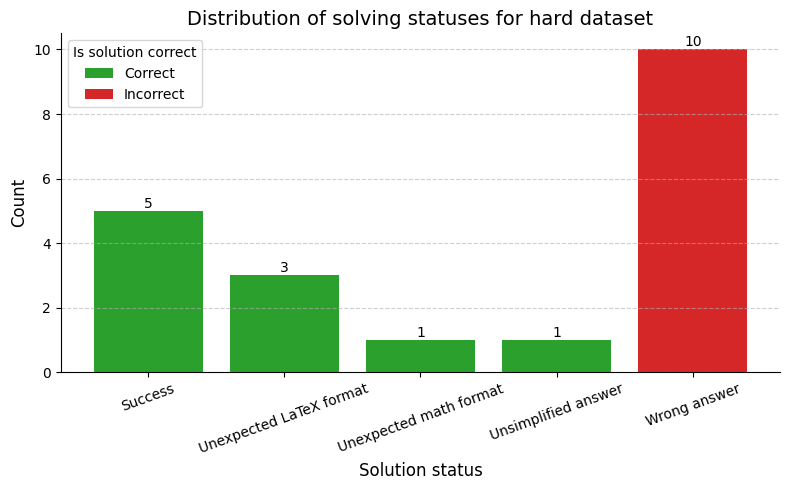

In [ ]:
"""
DEPRECATED. Barplot which I've tried to make myself. IMHO it just worse than piechart.
"""

import matplotlib.pyplot as plt

def barplot_error_types(
        statuses_counts: dict[str, int],
        dataset_name: str) -> None:
    _, ax = plt.subplots(figsize=(8, 5))

    FAILED_STATUSES = set(["No answer", "Wrong answer"])

    # Set up data to plot
    statuses = list(statuses_counts.keys())
    counts = list(statuses_counts.values())
    labels = ["Incorrect" if status in FAILED_STATUSES else "Correct"
              for status in statuses]
    colors = ["tab:red" if label == "Incorrect" else "tab:green"
              for label in labels]

    # Fix the quirk that duplicate labels aren't allowed
    seen_labels: set[str] = set()
    for i, label in enumerate(labels):
        if label in seen_labels:
            labels[i] = f"_{labels[i]}"
        seen_labels.add(label)
    print(labels)

    # Plot the data
    bars = ax.bar(statuses, counts, label=labels, color=colors)
    for bar in bars:
        bar_height = bar.get_height()
        ax.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=bar_height,
            s=f"{int(bar_height)}",
            ha="center",
            va="bottom",
        )

    # Set titles
    ax.set_title(f"Distribution of solving statuses for {dataset_name}", fontsize=14)
    ax.set_xlabel("Solution status", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.legend(title="Is solution correct")

    # Make graph prettier
    ax.set_xticklabels(statuses, rotation=20)
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


    plt.tight_layout()
    plt.show()


# status: str -> count: int
solutions_statuses = {
    "Success": 5,
    "Unexpected LaTeX format": 3,
    "Unexpected math format": 1,
    "Unsimplified answer": 1,
    "Wrong answer": 10# status: str -> count: int
solutions_statuses = {
    "Success": 5,
    "Unexpected LaTeX format": 3,
    "Unexpected math format": 1,
    "Unsimplified answer": 1,
    "Wrong answer": 10
}

barplot_error_types(solutions_statuses, "hard dataset")
del solutions_statuses

}

barplot_error_types(solutions_statuses, "hard dataset")
del solutions_statuses


# Распределение задач в датасетах по темам, оба датасета

/tmp/ipykernel_116375/360268492.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name, len(all_topics))


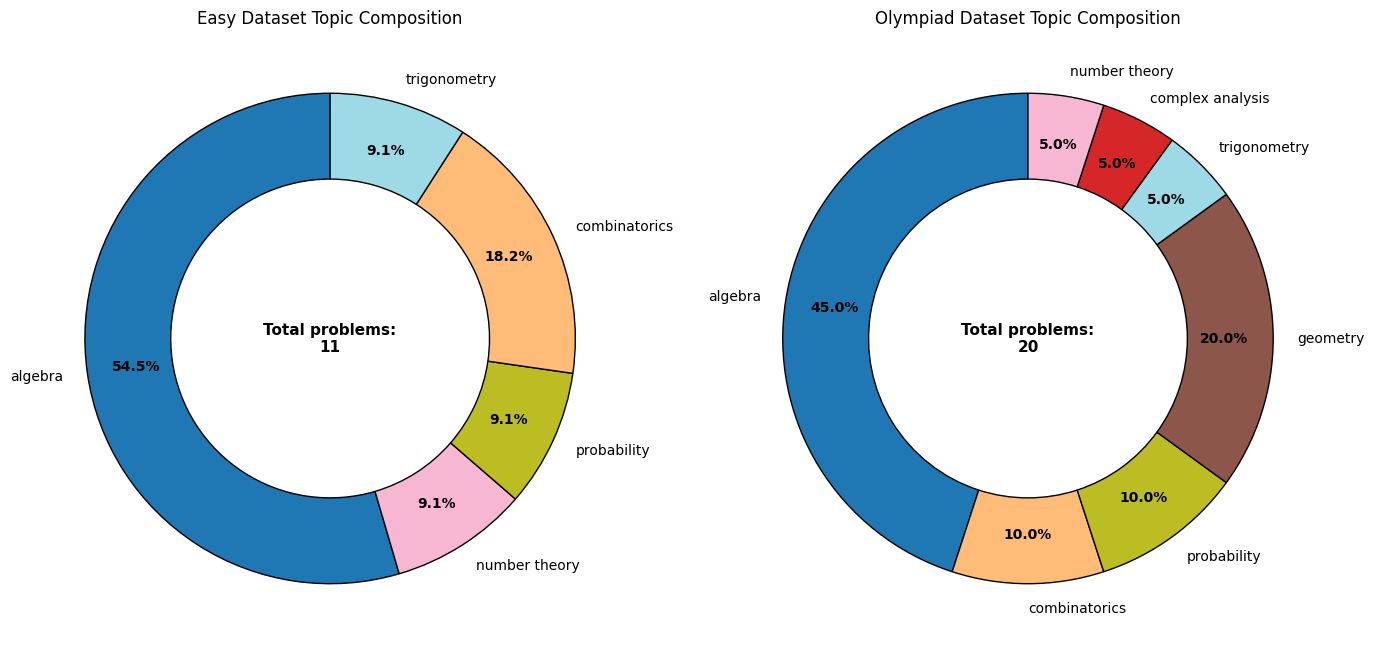

In [3]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from typing import Dict, Iterable


def build_topic_color_map(datasets: Iterable[list[dict]], cmap_name: str = "tab20") -> Dict[str, tuple]:
    """
    Builds a global topic -> color mapping shared across all plots.
    This guarantees that each topic always has the same color.
    """
    all_topics = set()
    for dataset in datasets:
        for task in dataset:
            all_topics.add(task["topic"])

    all_topics = sorted(all_topics)
    cmap = cm.get_cmap(cmap_name, len(all_topics))

    return {topic: cmap(i) for i, topic in enumerate(all_topics)}


def plot_topic_distribution_doughnut(
        ax: plt.Axes,
        dataset: list[dict],
        topic_color_map: Dict[str, tuple],
        title: str = "Problem Distribution by Topic"
) -> None:
    """
    Draws a doughnut chart on a given axis.

    - ax: matplotlib axis to draw on
    - dataset: list of tasks (each must contain a "topic" field)
    - topic_color_map: global mapping {topic -> color}, shared between plots
    """

    topic_counts = defaultdict(int)
    for task in dataset:
        topic_counts[task["topic"]] += 1

    topics = list(topic_counts.keys())
    counts = list(topic_counts.values())
    total = sum(counts)

    # Use global color mapping
    colors = [topic_color_map[topic] for topic in topics]

    wedges, texts, autotexts = ax.pie(
        counts,
        labels=topics,
        autopct="%1.1f%%",
        startangle=90,
        pctdistance=0.8,
        colors=colors,
        wedgeprops=dict(width=0.35, edgecolor="black")
    )

    # Improve readability of percentage labels
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_weight("bold")

    # Center text
    ax.text(
        0, 0,
        f"Total problems:\n{total}",
        ha="center", va="center",
        fontsize=11, fontweight="bold"
    )

    ax.set_title(title)
    ax.set_aspect("equal")


# ------------------------
# Example usage (side-by-side plots)
# ------------------------

with open("data/dataset_simple.json") as f:
    simple_data = json.load(f)

with open("data/dataset_olympiad.json") as f:
    olympiad_data = json.load(f)

# Build a single global color map for both datasets
topic_color_map = build_topic_color_map([simple_data, olympiad_data])

# Create side-by-side figure
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

plot_topic_distribution_doughnut(
    axes[0],
    simple_data,
    topic_color_map,
    title="Easy Dataset Topic Composition"
)

plot_topic_distribution_doughnut(
    axes[1],
    olympiad_data,
    topic_color_map,
    title="Olympiad Dataset Topic Composition"
)

plt.tight_layout()
plt.show()
